# Notebook 1: Business Understanding

This notebook will contain the visualisation and gathering of users data on Spotify.

## 1. Data acquisition

Spotify provides a [Web API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) that lets developers obtain a track's features given its *unique Spotify ID*. This section of the notebook aims at testing the API.

`track_features_fetcher.py` already contains a function `get_track_features` that, given a track ID in Spotify, returns the features associated to the track.

In [6]:
from track_features_fetcher import get_track_features

This function can be used by providing the Spotify URL to the track.

![](docs/get_track_link.png)

To get a taste of how gathering the data would look like, here is the output of the song for an arbitrary track.

In [7]:
get_track_features('https://open.spotify.com/track/0GELyRjqIrjkqA53BL9Tov?si=b25a4995f6be4a58')

{'danceability': 0.461,
 'energy': 0.501,
 'key': 5,
 'loudness': -6.455,
 'mode': 0,
 'speechiness': 0.0678,
 'acousticness': 0.576,
 'instrumentalness': 1.49e-06,
 'liveness': 0.092,
 'valence': 0.561,
 'tempo': 158.095}

A dataset can then be put together and annotated by the user for further analysis.

## 2. Exploratory Data Analysis

The data used for this section was annotated and made ready for download by [GeorgeMcIntire](https://www.kaggle.com/code/jaiswal003/spotify-dataset-eda). 

> A dataset of 2017 songs with attributes from Spotify's API. Each song is labeled "1" meaning I like it and "0" for songs I don't like. 

There are 16 columns. 13 of which are song attributes, one column for song name, one for artist, and a column called "target" which is the label for the song.

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
spotify = pd.read_csv('data.csv')

**Getting innformation about the dataset**

In [3]:
spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
spotify.shape

(2017, 17)

In [5]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


We can see that for the time_signature we have the same values =4 for the majority that's why we will drop it later

**We will check if our data contains any missing values or not.**

In [7]:
spotify.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

**We didn't find any Null information.
Now we will check if there is any duplicates**

In [8]:
spotify.drop_duplicates(inplace=True)
spotify

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [9]:
spotify.value_counts("target")

target
1    1020
0     997
dtype: int64

1 means I liked the song
0 means I didn't

### Data Visualization

In [ ]:
d_spotify=spotify.drop(columns=['Unnamed: 0','song_title','artist','time_signature'],inplace=False)
sns.pairplot(d_spotify)

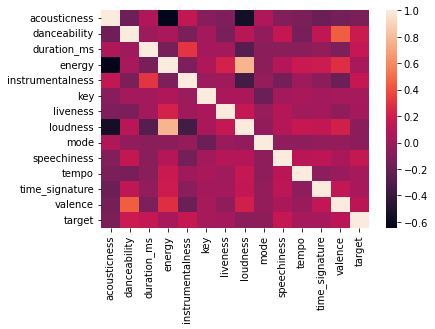

In [11]:
sns.heatmap(d_spotify.corr(method='pearson')) #pearson : standard correlation coefficient
plt.show()

We can see that the energy and loudness have high correlation.
We will drop one of them, we choose to drop energy.

In [12]:
d_spotify.drop(columns='energy',inplace=True)
d_spotify

,acousticness,danceability,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.01020,0.833,204600,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.19900,0.743,326933,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.03440,0.838,185707,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.60400,0.494,199413,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.18000,0.678,392893,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0
2013,0.08770,0.894,182182,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0
2014,0.00857,0.637,207200,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0
2015,0.00164,0.557,185600,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0


### Removing the outliers 

**Standarization**

In [92]:

x=pd.DataFrame(d_spotify,columns =['duration_ms','key','loudness','tempo'])
scaler = preprocessing.RobustScaler()
robust_spotify = scaler.fit_transform(x)
robust_spotify=pd.DataFrame(robust_spotify,columns =['duration_ms','key','loudness','tempo'])
for i in ['acousticness','danceability','instrumentalness','liveness','mode','speechiness','valence','target']:
    robust_spotify[i]=d_spotify[i]
scaler = preprocessing.StandardScaler()
standard_spotify = scaler.fit_transform(x)
standard_spotify=pd.DataFrame(standard_spotify,columns =['duration_ms','key','loudness','tempo'])
for i in ['acousticness','danceability','instrumentalness','liveness','mode','speechiness','valence','target']:
    standard_spotify[i]=d_spotify[i]
scaler = preprocessing.MinMaxScaler()
minmax_spotify = scaler.fit_transform(x)
minmax_spotify=pd.DataFrame(minmax_spotify,columns =['duration_ms','key','loudness','tempo'])
for i in ['acousticness','danceability','instrumentalness','liveness','mode','speechiness','valence','target']:
    minmax_spotify[i]=d_spotify[i]
print(robust_spotify)
print(standard_spotify)
print(minmax_spotify)

      duration_ms       key  loudness     tempo  acousticness  danceability  \
0       -0.350707 -0.571429 -0.698191  0.760356       0.01020         0.833   
1        1.389004 -0.714286 -1.138432  1.026447       0.19900         0.743   
2       -0.619386 -0.571429 -0.246711 -1.231625       0.03440         0.838   
3       -0.424472 -0.142857 -2.463816 -0.928279       0.60400         0.494   
4        2.327029 -0.142857 -1.480263  1.396097       0.18000         0.678   
...           ...       ...       ...       ...           ...           ...   
2012     0.641984 -0.714286  0.753015 -1.233431       0.00106         0.584   
2013    -0.669516 -0.714286  0.982730 -0.302337       0.08770         0.894   
2014    -0.313732 -0.857143  1.036458  0.760887       0.00857         0.637   
2015    -0.620908 -0.714286  0.962993  0.759002       0.00164         0.557   
2016    -0.351844  0.428571  0.007401  1.821190       0.00281         0.446   

      instrumentalness  liveness  mode  speechiness

We choose StandardScaler

**Blox plot**

{'whiskers': [<matplotlib.lines.Line2D at 0x1232eaf8580>,
 'caps': [<matplotlib.lines.Line2D at 0x1232eaf8ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1232eaf81f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1232eb02400>,
 'fliers': [<matplotlib.lines.Line2D at 0x1232eb02790>,
 'means': []}

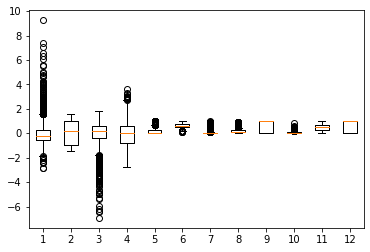

In [93]:
fig.set_figwidth(10)
fig.set_figheight(6)
plt.boxplot(standard_spotify)

In [94]:
standard_spotify.describe()

,duration_ms,key,loudness,tempo,acousticness,danceability,instrumentalness,liveness,mode,speechiness,valence,target
count,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,-8.548222e-17,7.166635e-17,2.343468e-16,-2.842435e-16,0.187590,0.618422,0.133286,0.190844,0.612295,0.092664,0.496815,0.505702
std,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,0.259989,0.161029,0.273162,0.155453,0.487347,0.089931,0.247195,0.500091
min,-2.809419e+00,-1.464792e+00,-6.916536e+00,-2.764133e+00,0.000003,0.122000,0.000000,0.018800,0.000000,0.023100,0.034800,0.000000
25%,-5.647920e-01,-9.164464e-01,-3.479027e-01,-8.026643e-01,0.009630,0.514000,0.000000,0.092300,0.000000,0.037500,0.295000,0.000000
50%,-2.079659e-01,1.802444e-01,2.227279e-01,-6.607136e-03,0.063300,0.631000,0.000076,0.127000,1.000000,0.054900,0.492000,1.000000
75%,2.931475e-01,1.002763e+00,6.221161e-01,6.089335e-01,0.265000,0.738000,0.054000,0.247000,1.000000,0.108000,0.691000,1.000000
max,9.252160e+00,1.551108e+00,1.802465e+00,3.663097e+00,0.995000,0.984000,0.976000,0.969000,1.000000,0.816000,0.992000,1.000000


we can see that there is a great number of outliers for duration we will see each feature's boxplot

**duration_ms**

<AxesSubplot:xlabel='target', ylabel='duration_ms'>

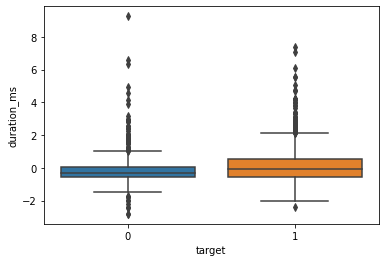

In [96]:
sns.boxplot(x="target",y=standard_spotify.columns[0] ,data=standard_spotify)

In [179]:
#standard_spotify[standard_spotify['target']==1][standard_spotify['duration_ms']<-2] =936
d1=standard_spotify[standard_spotify['duration_ms']<8].drop(index=936)

**loudness**

<AxesSubplot:xlabel='target', ylabel='loudness'>

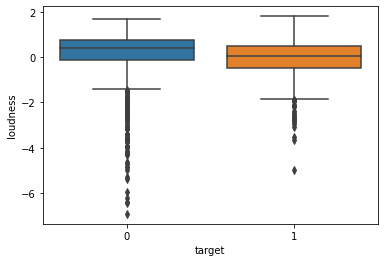

In [167]:
sns.boxplot(x="target",y=d1.columns[2] ,data=d1)

In [180]:
#d1[d1['target']==1][d1['loudness']<-4] =817
d1=d1[d1['duration_ms']<8].drop(index=817)

**liveness**

<AxesSubplot:xlabel='target', ylabel='liveness'>

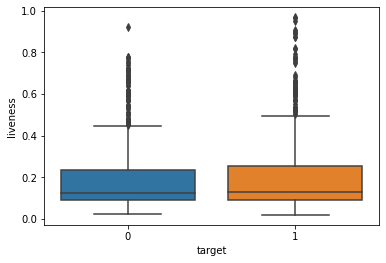

In [170]:
sns.boxplot(x="target",y=d1.columns[7] ,data=d1)

In [181]:
#d1[d1['target']==0][d1['liveness']>0.8] =1432
d1=d1[d1['duration_ms']<8].drop(index=1432)

**speechiness**

<AxesSubplot:xlabel='target', ylabel='speechiness'>

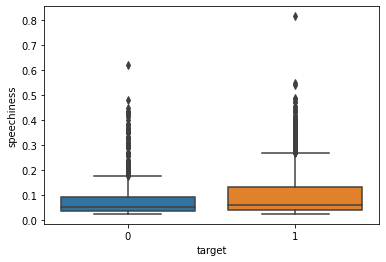

In [172]:
sns.boxplot(x="target",y=d1.columns[9] ,data=d1)

In [182]:
d1=d1[d1['speechiness']<0.6]

In [186]:
d1

,duration_ms,key,loudness,tempo,acousticness,danceability,instrumentalness,liveness,mode,speechiness,valence,target
0,-0.508851,-0.916446,-0.454530,1.066709,0.01020,0.833,0.021900,0.1650,1,0.4310,0.286,1
1,0.983716,-1.190619,-0.881573,1.442323,0.19900,0.743,0.006110,0.1370,1,0.0794,0.588,1
2,-0.739362,-0.916446,-0.016586,-1.745166,0.03440,0.838,0.000234,0.1590,1,0.2890,0.173,1
3,-0.572137,-0.093928,-2.167220,-1.316964,0.60400,0.494,0.510000,0.0922,1,0.0261,0.230,1
4,1.788484,-0.093928,-1.213155,1.964120,0.18000,0.678,0.512000,0.4390,0,0.0694,0.904,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.342817,-1.190619,0.953167,-1.747715,0.00106,0.584,0.002690,0.1290,1,0.3330,0.211,0
2013,-0.782370,-1.190619,1.175995,-0.433385,0.08770,0.894,0.001670,0.0528,1,0.1310,0.867,0
2014,-0.477129,-1.464792,1.228112,1.067459,0.00857,0.637,0.003990,0.2140,1,0.1070,0.470,0
2015,-0.740667,-1.190619,1.156850,1.064798,0.00164,0.557,0.677000,0.0913,1,0.1330,0.623,0
